In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.tree import export_graphviz
import graphviz

In [ ]:
df=pd.read_csv("/content/HW2.csv")

In [ ]:
df.tail()

,S.No,plod,name,title,gender,culture,dateOfBirth,DateoFdeath,mother,father,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
1941,1942,0.197,Luwin,NaN,1,Westeros,NaN,299.0,NaN,NaN,...,NaN,NaN,0,0,NaN,0,0,1,0.351171,0
1942,1943,0.013,Reek,NaN,1,NaN,NaN,299.0,NaN,NaN,...,NaN,NaN,0,0,NaN,0,0,0,0.096990,0
1943,1944,0.480,Symeon Star-Eyes,NaN,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0,NaN,0,0,0,0.030100,1
1944,1945,0.363,Coldhands,NaN,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0,NaN,0,0,0,0.130435,1
1945,1946,0.907,Tytos Lannister,Casterly Rock,1,NaN,220.0,267.0,NaN,NaN,...,NaN,1.0,1,1,47.0,4,1,0,0.210702,0


In [ ]:
df.head()

,S.No,plod,name,title,gender,culture,dateOfBirth,DateoFdeath,mother,father,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
0,1,0.946,Viserys II Targaryen,NaN,1,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,...,0.0,NaN,0,0,NaN,11,1,1,0.605351,0
1,2,0.613,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,...,NaN,1.0,1,1,97.0,1,1,1,0.896321,1
2,3,0.507,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,1,NaN,0,0,0,0.267559,1
3,4,0.924,Aemma Arryn,Queen,0,NaN,82.0,105.0,NaN,NaN,...,NaN,0.0,1,1,23.0,0,0,0,0.183946,0
4,5,0.383,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,...,NaN,1.0,1,1,29.0,0,0,0,0.043478,1


In [ ]:
df.describe()

,S.No,plod,gender,dateOfBirth,DateoFdeath,book1,book2,book3,book4,book5,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
count,1946.000000,1946.000000,1946.000000,433.000000,444.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,...,23.000000,276.000000,1946.000000,1946.000000,433.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000
mean,973.500000,0.365530,0.619219,1577.364896,2950.193694,0.198356,0.374615,0.480473,0.591984,0.395170,...,0.652174,0.778986,0.141829,0.460946,-1293.563510,0.305755,0.074512,0.059096,0.089584,0.745632
std,561.906131,0.312637,0.485704,19565.414460,28192.245529,0.398864,0.484148,0.499747,0.491593,0.489013,...,0.486985,0.415684,0.348965,0.498601,19564.340993,1.383910,0.262669,0.235864,0.160568,0.435617
min,1.000000,0.000000,0.000000,-28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-298001.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,487.250000,0.101000,0.000000,240.000000,282.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.013378,0.000000
50%,973.500000,0.264500,1.000000,268.000000,299.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.033445,1.000000
75%,1459.750000,0.608750,1.000000,285.000000,299.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,1.000000,50.000000,0.000000,0.000000,0.000000,0.086957,1.000000
max,1946.000000,1.000000,1.000000,298299.000000,298299.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,100.000000,15.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.nunique()

S.No                 1946
plod                  693
name                 1946
title                 262
gender                  2
culture                64
dateOfBirth           134
DateoFdeath            69
mother                 17
father                 20
heir                   22
house                 347
spouse                254
book1                   2
book2                   2
book3                   2
book4                   2
book5                   2
isAliveMother           2
isAliveFather           2
isAliveHeir             2
isAliveSpouse           2
isMarried               2
isNoble                 2
age                    85
numDeadRelations       14
boolDeadRelations       2
isPopular               2
popularity            166
isAlive                 2
dtype: int64

In [ ]:
df['age'].unique()

array([         nan,  9.70000e+01,  2.30000e+01,  2.90000e+01,
        2.60000e+01,  1.60000e+01,  2.50000e+01,  5.90000e+01,
        1.90000e+01,  2.70000e+01,  2.20000e+01,  1.00000e+02,
        1.40000e+01,  4.20000e+01,  3.50000e+01,  3.00000e+00,
        5.50000e+01,  1.50000e+01,  2.10000e+01,  5.30000e+01,
        6.00000e+00,  3.70000e+01,  1.10000e+01,  1.70000e+01,
        1.00000e+01,  2.00000e+01,  4.50000e+01,  9.00000e+00,
        2.40000e+01,  1.30000e+01,  5.20000e+01,  5.00000e+01,
        2.00000e+00,  5.60000e+01,  0.00000e+00,  3.90000e+01,
        1.20000e+01,  8.50000e+01,  5.40000e+01,  2.80000e+01,
        3.10000e+01,  6.10000e+01,  1.80000e+01,  7.00000e+01,
        9.40000e+01,  6.50000e+01,  6.40000e+01,  7.90000e+01,
        4.00000e+01,  4.90000e+01,  7.60000e+01,  4.10000e+01,
        7.00000e+00,  8.00000e+00,  4.60000e+01,  3.00000e+01,
        5.10000e+01,  7.50000e+01,  8.20000e+01,  4.30000e+01,
        8.10000e+01,  6.00000e+01,  4.70000e+01,  6.900

In [ ]:
df['age'].unique()

array([         nan,  9.70000e+01,  2.30000e+01,  2.90000e+01,
        2.60000e+01,  1.60000e+01,  2.50000e+01,  5.90000e+01,
        1.90000e+01,  2.70000e+01,  2.20000e+01,  1.00000e+02,
        1.40000e+01,  4.20000e+01,  3.50000e+01,  3.00000e+00,
        5.50000e+01,  1.50000e+01,  2.10000e+01,  5.30000e+01,
        6.00000e+00,  3.70000e+01,  1.10000e+01,  1.70000e+01,
        1.00000e+01,  2.00000e+01,  4.50000e+01,  9.00000e+00,
        2.40000e+01,  1.30000e+01,  5.20000e+01,  5.00000e+01,
        2.00000e+00,  5.60000e+01,  0.00000e+00,  3.90000e+01,
        1.20000e+01,  8.50000e+01,  5.40000e+01,  2.80000e+01,
        3.10000e+01,  6.10000e+01,  1.80000e+01,  7.00000e+01,
        9.40000e+01,  6.50000e+01,  6.40000e+01,  7.90000e+01,
        4.00000e+01,  4.90000e+01,  7.60000e+01,  4.10000e+01,
        7.00000e+00,  8.00000e+00,  4.60000e+01,  3.00000e+01,
        5.10000e+01,  7.50000e+01,  8.20000e+01,  4.30000e+01,
        8.10000e+01,  6.00000e+01,  4.70000e+01,  6.900

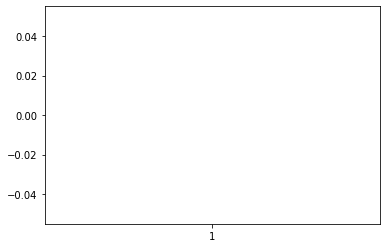

In [ ]:
plt.boxplot(df.DateoFdeath)
plt.show()

In [ ]:
x = df[['gender','isPopular','isMarried','isNoble',]]
y = df['isAlive']

In [ ]:
x_c = ['gender','isPopular','isMarried','isNoble',]

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

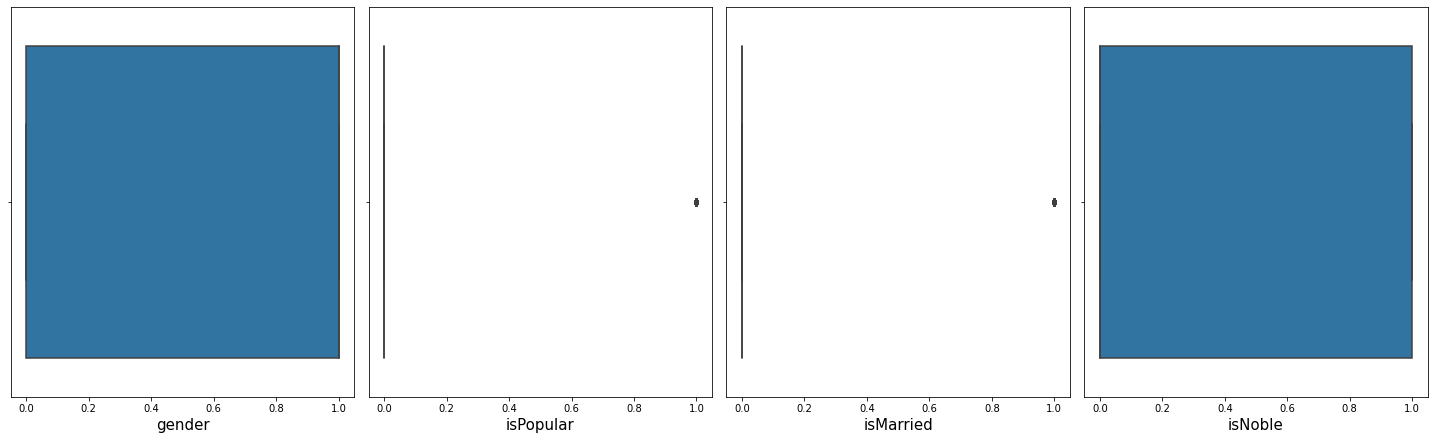

In [ ]:
plt.figure(figsize =(25,30))
plotnumber = 1

for col in x_c:
    if plotnumber <= 6:
        ax = plt.subplot(5, 5, plotnumber)
        sns.boxplot(x[col])
        plt.xlabel(col, fontsize = 15)

    plotnumber += 1
plt.tight_layout()
plt.show()

In [ ]:
, x_test, y_train, y_test=trx_trainain_test_split(x,y,test_size = 0.25, random_state=0)

In [ ]:
st_x = StandardScaler()  
x_train= st_x.fit_transform(x_train)
x_test= st_x.transform(x_test)

In [ ]:
clf = DecisionTreeClassifier(criterion='gini',random_state=0)
clf.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
confusion_matrix(y_test,y_pred)

array([[  9, 118],
       [ 11, 349]])

In [ ]:
accuracy_score(y_test,y_pred)

0.7351129363449692

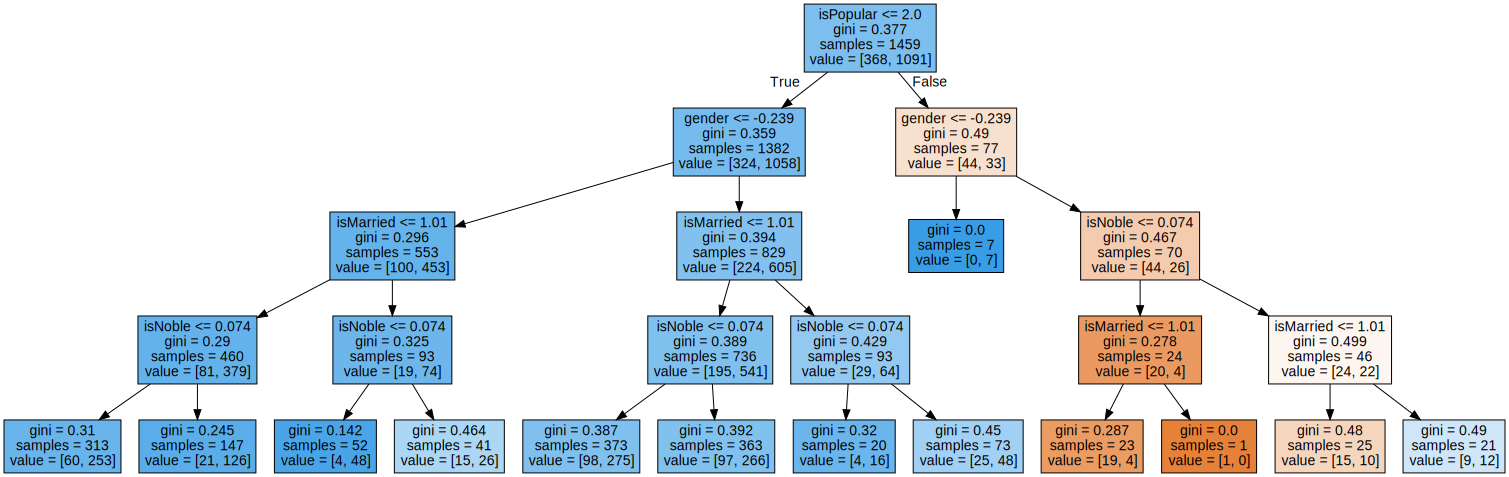

In [ ]:
graphviz.Source(export_graphviz(clf,feature_names=x.columns,filled=True))